In [145]:
%load_ext autoreload
%autoreload 2
from NBT import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Gene SYMBOL 2 ENSG
Symbol2ENSG, Uniprot2ENSG, ENSP2ENSG, Entrez2ENSG = LoadIDMapping()
ENSG2Symbol = {}
for k,v in Symbol2ENSG.items():
    ENSG2Symbol[v] = k

In [3]:
PrePPI, unmappedUniprot = LoadNetworkPrePPI(Uniprot2ENSG)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/igraph/__init__.py:2280: RuntimeWarning: A non-numeric, non-string, non-boolean edge attribute was ignored at foreign.c:2648
  return writer(f, *args, **kwds)


In [4]:
subPrePPI = PrePPI.subgraph_edges(PrePPI.es.select(weight_ge=1e6))
print(len(subPrePPI.vs))
print(np.mean(subPrePPI.degree()))

9023
11.945915992463704


## SCZ

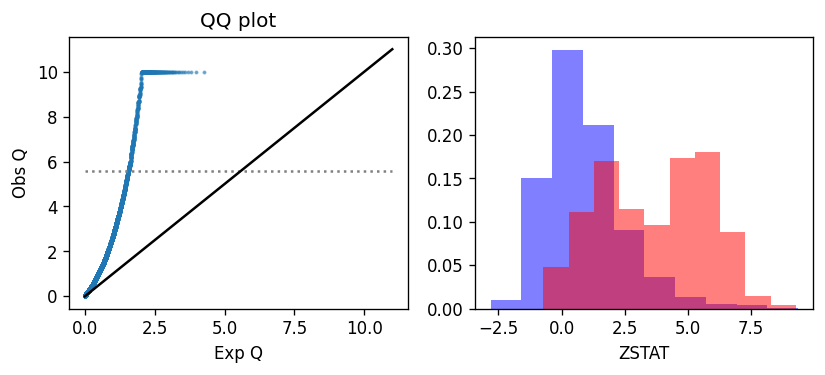

In [5]:
SCZ_high_conf_gene = pd.read_csv("../dat/network/psychencode/INT-17_SCZ_High_Confidence_Gene_List.csv")
SCZ_Core = SCZ_high_conf_gene["sczgenenames"].values
GeneTest = ProcessLoadGeneTestAndPlot("../dat/GWAS/GeneTest/scz.genetest.tsv", SCZ_Core)

Core gene avg:3.685	random genes avg:3.920	p=9.367e-72


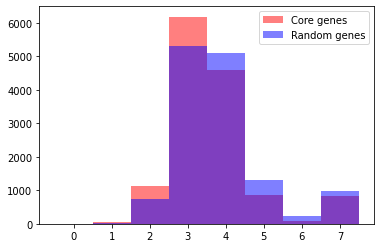

In [15]:
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, SCZ_Core, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

Core gene avg:3.855	random genes avg:4.714	p=0.000e+00


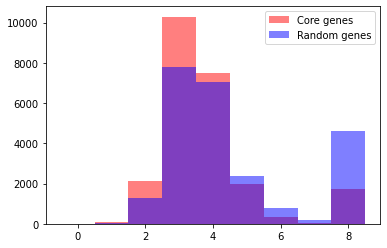

In [16]:
Zcut = 7
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

Core gene avg:3.857	random genes avg:4.407	p=0.000e+00


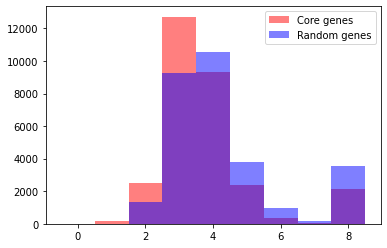

In [17]:
Zcut = 6
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

Core gene avg:4.272	random genes avg:4.859	p=0.000e+00


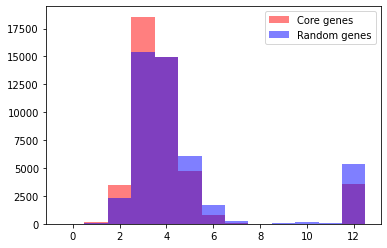

In [18]:
Zcut = 5
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [19]:
Zcut = 4
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

KeyboardInterrupt: 

In [ ]:
Zcut = 3
ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [13]:
CoreGenePLen = [x for x in CoreGenePLen if x < 10]
np.std(CoreGenePLen)/math.sqrt(len(CoreGenePLen))

0.0013752768969930457

In [8]:
zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
for Zcut in zcuts:
    ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = max([x for x in CoreGenePLen + rndGenePLen if x < 100]) + 1
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    Case_err.append(np.std(CoreGenePLen)/math.sqrt(len(CoreGenePLen)))
    Cont_mean.append(np.mean(rndGenePLen))
    Cont_err.append(np.std(rndGenePLen)/math.sqrt(len(rndGenePLen)))

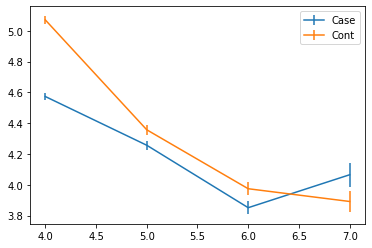

In [21]:
plt.errorbar(zcuts, Case_mean, yerr=1.96*np.array(Case_err), label="Case")
plt.errorbar(zcuts, Cont_mean, yerr=1.96*np.array(Cont_err), label="Cont")
plt.legend()

Core gene avg:3.966	random genes avg:3.752	p=2.607e-03


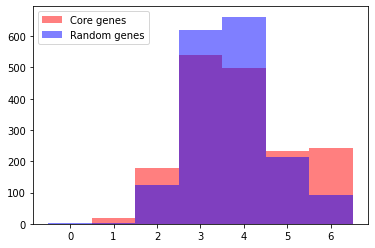

In [22]:
Zcut = 7
ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

Core gene avg:4.065	random genes avg:3.943	p=2.526e-02


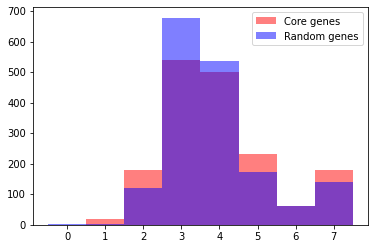

In [23]:
Zcut = 7
ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

Core gene avg:4.065	random genes avg:4.687	p=1.268e-21


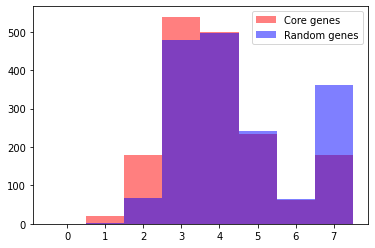

In [24]:
Zcut = 7
ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

Core gene avg:3.966	random genes avg:3.680	p=3.499e-07


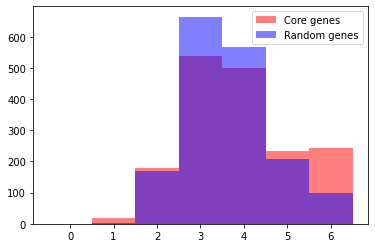

In [25]:
Zcut = 7
ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

Core gene avg:4.065	random genes avg:4.353	p=1.094e-06


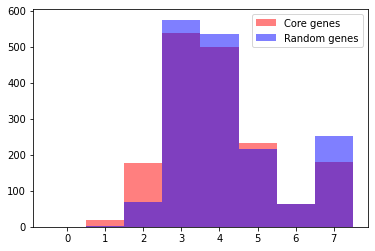

In [26]:
Zcut = 7
ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
PlotShortestPathDist(CoreGenePLen, rndGenePLen)

In [27]:
subPrePPI.diameter()

14

In [30]:
random_nodes = np.random.choice(subPrePPI.vs, 1000)
RDMGenePLen = []
for n1, n2 in itertools.combinations(random_nodes, r=2):
    pLen = subPrePPI.shortest_paths_dijkstra(n1, n2, mode="ALL")[0][0]
    RDMGenePLen.append(pLen)

In [31]:
rndGenePLen = [min(x,15) for x in RDMGenePLen]

In [35]:
graph_std = np.std(rndGenePLen)

In [36]:
zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:
    ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = max([x for x in CoreGenePLen + rndGenePLen if x < 100]) + 1
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    Cont_mean.append(np.mean(rndGenePLen))
    Cont_err.append(graph_std/math.sqrt(len(rndGenePLen)))
    Dat.append((CoreGenePLen, rndGenePLen))

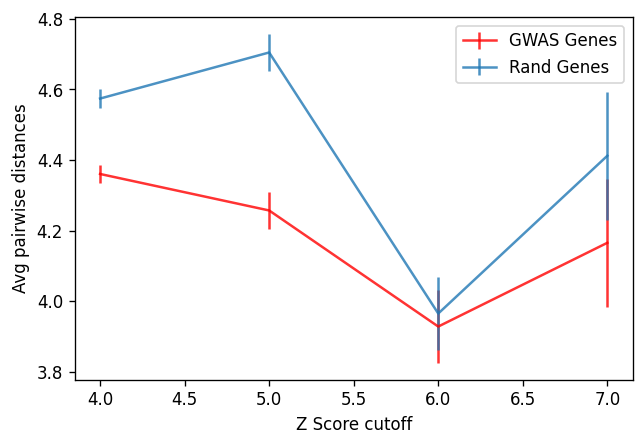

In [41]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=1.96*np.array(Case_err), label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=1.96*np.array(Cont_err), label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.legend()

In [42]:
zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:
    ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
    CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = max([x for x in CoreGenePLen + rndGenePLen if x < 100]) + 1
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    Cont_mean.append(np.mean(rndGenePLen))
    Cont_err.append(graph_std/math.sqrt(len(rndGenePLen)))
    Dat.append((CoreGenePLen, rndGenePLen))

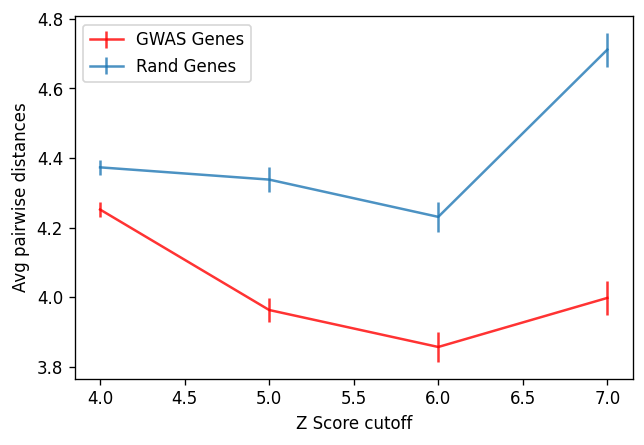

In [43]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=1.96*np.array(Case_err), label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=1.96*np.array(Cont_err), label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.legend()

In [6]:
sPathes = subPrePPI.shortest_paths_dijkstra()

In [7]:
np.savetxt("subPrePPI.spath.csv", sPathes, delimiter=",")

In [8]:
writer = csv.writer(open("subPrePPI.spath.csv", 'wt'), delimiter=",")
for row in sPathes:
    writer.writerow(row)

In [9]:
type(sPathes)

list

In [111]:
def GetRndRes(rndGenePLens):
    Means = []
    for i in range(len(rndGenePLens)):
        mean = np.mean(rndGenePLens[i])
        Means.append(mean)
    return np.mean(Means), min(Means), max(Means)

def GetRndRes2(rndGenePLens):
    Means = []
    for i in range(len(rndGenePLens)):
        mean = np.mean(rndGenePLens[i])
        Means.append(mean)
    return np.mean(Means), np.std(Means)/10

In [11]:
node = subPrePPI.vs[0]
node.index

0

In [118]:
zcuts = [7, 6, 5, 4, 3, 2, 1]
#zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:

    #ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
    CoreGenePLen, rndGenePLens = CompareShortestPathDist2(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    #CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    #rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    #Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    
    #cont_Mean, cont_min, cont_max = GetRndRes(rndGenePLens)
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)
    #Cont_err.append((cont_Mean - cont_min, Cont_max-cont_Mean))
    #Dat.append((CoreGenePLen, rndGenePLen))
    #print(Zcut, )

220
244
305
487
961
1944
3761


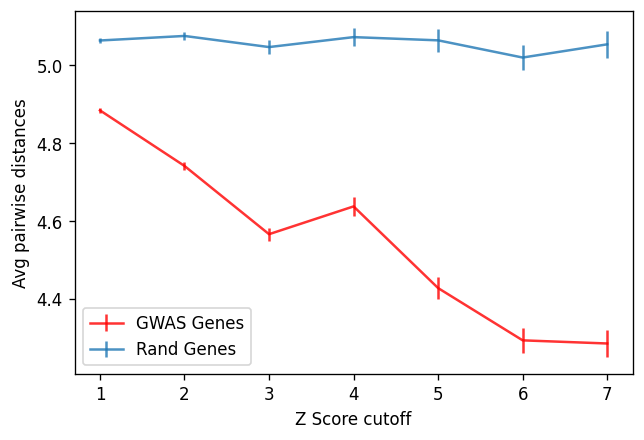

In [119]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.legend()

In [135]:
# zcuts = [7, 6, 5, 4, 3, 2, 1]
zcuts = [5, 4, 3, 2, 1, 0]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:

    #ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()))
    CoreGenePLen, rndGenePLens = CompareShortestPathDist2(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    #CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    #rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    #Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    
    #cont_Mean, cont_min, cont_max = GetRndRes(rndGenePLens)
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)

201
402
891
1896
3737
6319


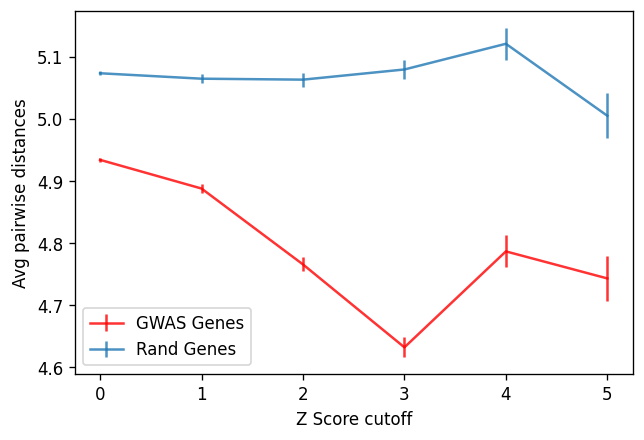

In [136]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.legend()

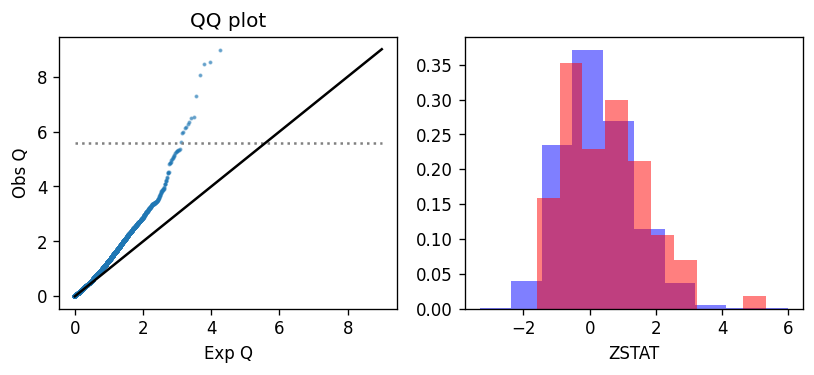

In [123]:
df = pd.read_csv("/Users/jiayao/Work/spark/dat/SFARI-Gene_genes_05-06-2019release_05-22-2019export.csv")
ASD_Core = df[df["gene-score"].isin([1.0, 2.0])]["gene-symbol"].values
ASDGeneTest = ProcessLoadGeneTestAndPlot("../dat/GWAS/GeneTest/asd.genetest.tsv", ASD_Core)

In [131]:
zcuts = [5, 4, 3, 2, 1, 0]
#zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:

    #ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    ZCUT_GENEs = list(set(ASDGeneTest[ASDGeneTest["ZSTAT"]>Zcut].index.values.tolist()))
    CoreGenePLen, rndGenePLens = CompareShortestPathDist2(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    #CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    #rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    #Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    
    #cont_Mean, cont_min, cont_max = GetRndRes(rndGenePLens)
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)

2
16
88
565
1898
4750


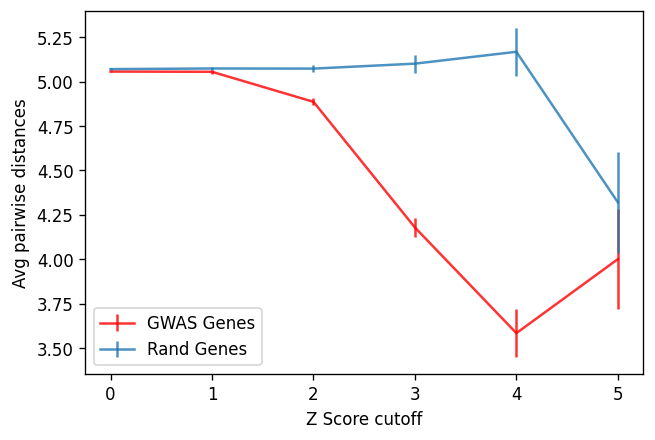

In [132]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.legend()

In [133]:
zcuts = [5, 4, 3, 2, 1, 0]
#zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:

    #ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    ZCUT_GENEs = list(set(ASDGeneTest[ASDGeneTest["ZSTAT"]>Zcut].index.values.tolist() + ASD_Core.tolist()))
    CoreGenePLen, rndGenePLens = CompareShortestPathDist2(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    #CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    #rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    #Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    
    #cont_Mean, cont_min, cont_max = GetRndRes(rndGenePLens)
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)
    #Cont_err.append((cont_Mean - cont_min, Cont_max-cont_Mean))
    #Dat.append((CoreGenePLen, rndGenePLen))
    #print(Zcut, )

73
87
157
629
1947
4781


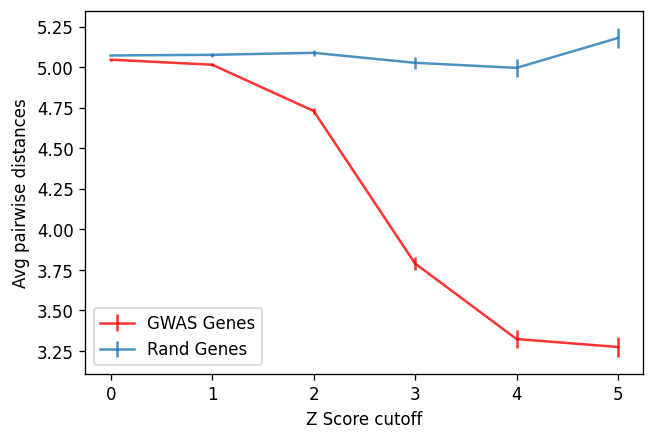

In [134]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.legend()

In [ ]:
sPathes[1]

In [153]:
zcuts = [7, 6, 5, 4, 3, 2, 1]
#zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:

    #ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    ZCUT_GENEs = list(set(GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist() + SCZ_Core.tolist()))
    CoreGenePLen, rndGenePLens = CompareNearestPath(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    #rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    #Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    
    #cont_Mean, cont_min, cont_max = GetRndRes(rndGenePLens)
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)
    #Cont_err.append((cont_Mean - cont_min, Cont_max-cont_Mean))
    #Dat.append((CoreGenePLen, rndGenePLen))
    #print(Zcut, )

220
244
305
487
961
1944
3761


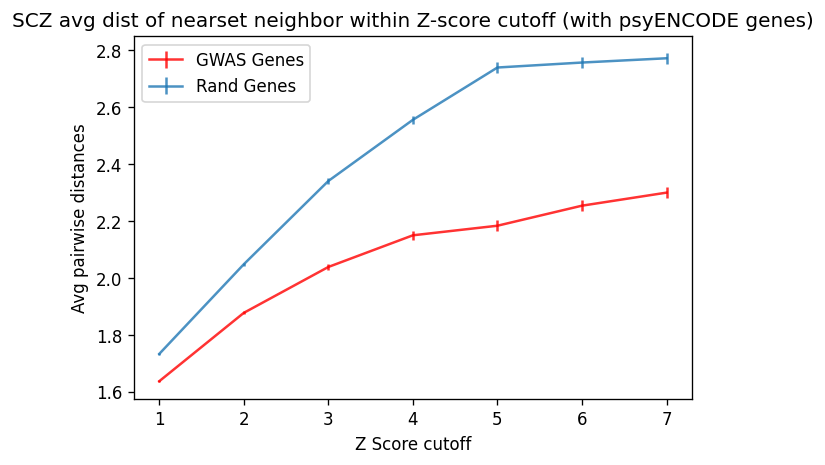

In [157]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.legend()
plt.title("SCZ avg dist of nearset neighbor within Z-score cutoff (with psyENCODE genes)")
plt.show()

In [158]:
## Nearest distance
zcuts = [5, 4, 3, 2, 1, 0]
#zcuts = [7, 6, 5, 4]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:

    #ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    ZCUT_GENEs = list(set(ASDGeneTest[ASDGeneTest["ZSTAT"]>Zcut].index.values.tolist() + ASD_Core.tolist()))
    CoreGenePLen, rndGenePLens = CompareNearestPath(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    #CoreGenePLen, rndGenePLen = CompareShortestPathDist(subPrePPI, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    #rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    #Case_err.append(graph_std/math.sqrt(len(CoreGenePLen)))
    
    #cont_Mean, cont_min, cont_max = GetRndRes(rndGenePLens)
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)
    #Cont_err.append((cont_Mean - cont_min, Cont_max-cont_Mean))
    #Dat.append((CoreGenePLen, rndGenePLen))
    #print(Zcut, )

73
87
157
629
1947
4781


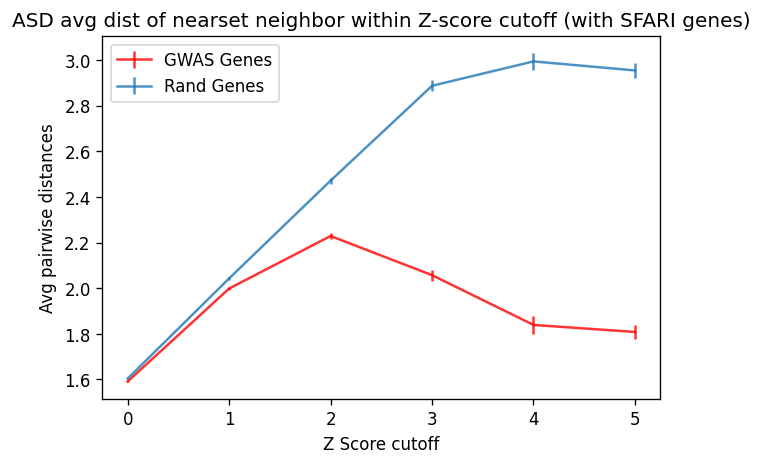

In [159]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.title("ASD avg dist of nearset neighbor within Z-score cutoff (with SFARI genes)")
plt.legend()
plt.show()

In [160]:
zcuts = [7, 6, 5, 4, 3, 2, 1]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:
    ZCUT_GENEs = GeneTest[GeneTest["ZSTAT"]>Zcut].index.values.tolist()
    CoreGenePLen, rndGenePLens = CompareNearestPath(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    Case_mean.append(np.mean(CoreGenePLen))
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)

59
103
201
402
891
1896
3737


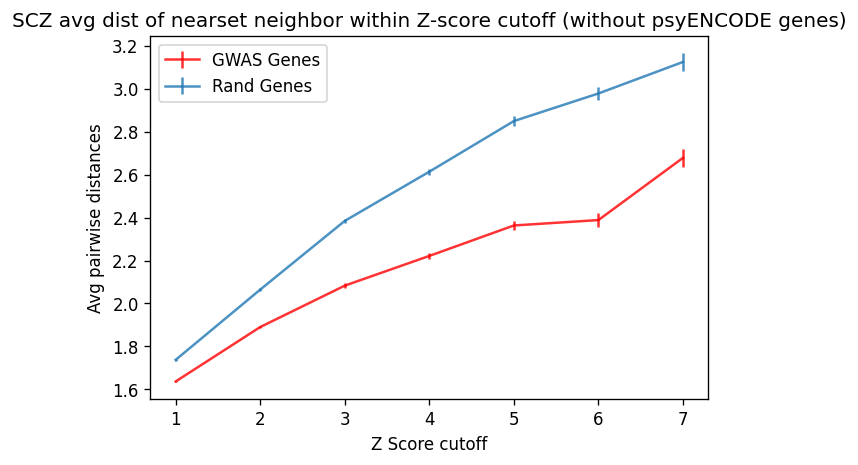

In [161]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.title("SCZ avg dist of nearset neighbor within Z-score cutoff (without psyENCODE genes)")
plt.legend()
plt.show()

In [162]:
## Nearest distance
zcuts = [5, 4, 3, 2, 1, 0]
Case_mean, Case_err, Cont_mean, Cont_err = [],[],[],[]
Dat = []
for Zcut in zcuts:
    ZCUT_GENEs = ASDGeneTest[ASDGeneTest["ZSTAT"]>Zcut].index.values.tolist()
    CoreGenePLen, rndGenePLens = CompareNearestPath(subPrePPI, sPathes, ZCUT_GENEs, Symbol2ENSG)
    cap = 15
    CoreGenePLen = [min(x,cap) for x in CoreGenePLen]
    for i in range(len(rndGenePLens)):
        rndGenePLens[i] = [min(x,cap) for x in rndGenePLens[i]]
    #rndGenePLen = [min(x,cap) for x in rndGenePLen]
    Case_mean.append(np.mean(CoreGenePLen))
    cont_Mean, cont_std = GetRndRes2(rndGenePLens)
    cont_min = np.percentile(rndGenePLens, 2.5)
    cont_max = np.percentile(rndGenePLens, 97.5)
    Cont_mean.append(cont_Mean)
    Case_err.append(cont_std)
    Cont_err.append(cont_std)

2
16
88
565
1898
4750


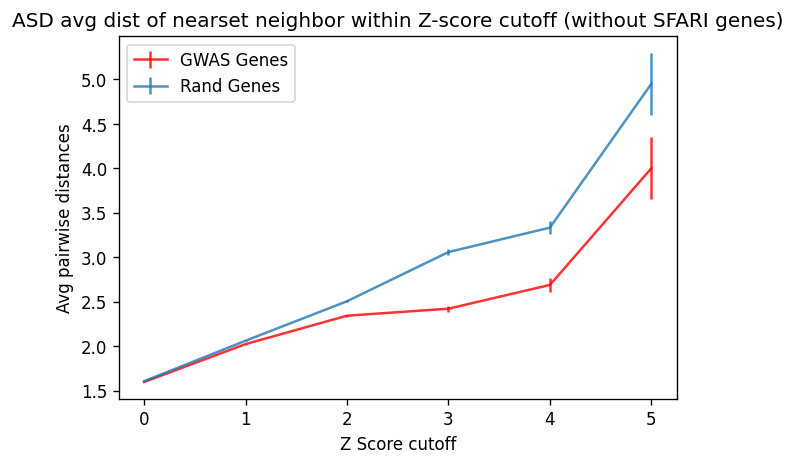

In [163]:
plt.figure(dpi=120)
plt.errorbar(zcuts, Case_mean, yerr=Case_err, label="GWAS Genes", color="red", alpha=.8)
plt.errorbar(zcuts, Cont_mean, yerr=Cont_err, label="Rand Genes", alpha=.8)
plt.xlabel("Z Score cutoff")
plt.ylabel("Avg pairwise distances")
plt.title("ASD avg dist of nearset neighbor within Z-score cutoff (without SFARI genes)")
plt.legend()
plt.show()